In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\KimoStore\Downloads


In [3]:
#!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="6NZZm2MPEFhUvVRx7Mi5")
project = rf.workspace("yolo-hhkbh").project("coil-counting")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to coil-counting-3 in yolov8:: 100%|█████████████████| 192/192 [00:00<00:00, 642.65it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

C:\Users\KimoStore\Downloads


In [4]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train15/weights/best.pt data={dataset.location}/data.yaml

C:\Users\KimoStore\Downloads


Ultralytics YOLOv8.0.195  Python-3.11.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-2670QM 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\KimoStore\Downloads\coil-counting-3\coil-counting-3\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]
val: Scanning C:\Users\KimoStore\Downloads\coil-counting-3\coil-counting-3\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|##########| 3/3 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:01<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:01<00:00,  1.82s/it]
                   all          3         14      0.851      0.929      0.969   

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train15/weights/best.pt conf=0.9 source={dataset.location}/test/images save=True

C:\Users\KimoStore\Downloads


Ultralytics YOLOv8.0.195  Python-3.11.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-2670QM 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 C:\Users\KimoStore\Downloads\coil-counting-3\test\images\17_jpeg.rf.53c8b183d2aecc9d044ea61cee4efbc7.jpg: 640x640 5 coils, 515.4ms
image 2/3 C:\Users\KimoStore\Downloads\coil-counting-3\test\images\20_jpeg.rf.45109f3a23ebd258cc7fe1babc5ccf24.jpg: 640x640 8 coils, 618.6ms
image 3/3 C:\Users\KimoStore\Downloads\coil-counting-3\test\images\8_jpeg.rf.4b1bcf876123d9d39cb4c9a95b0ffa79.jpg: 640x640 2 coils, 601.0ms
Speed: 6.7ms preprocess, 578.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict20
 Learn more at https://docs.ultralytics.com/modes/predict


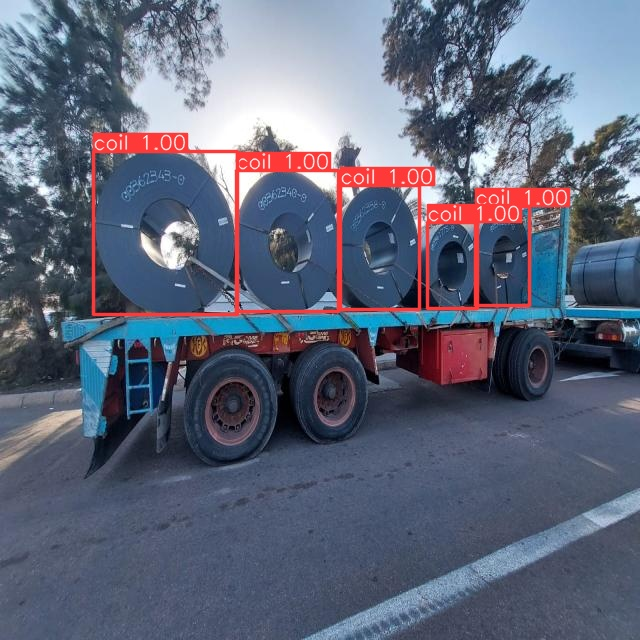

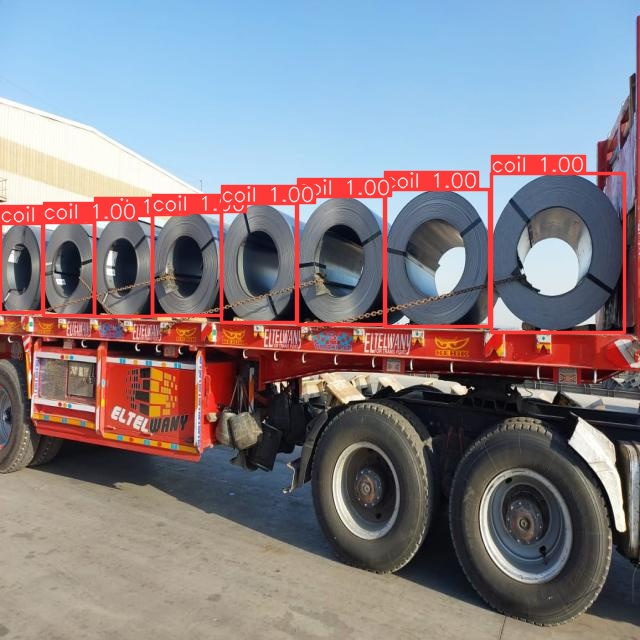

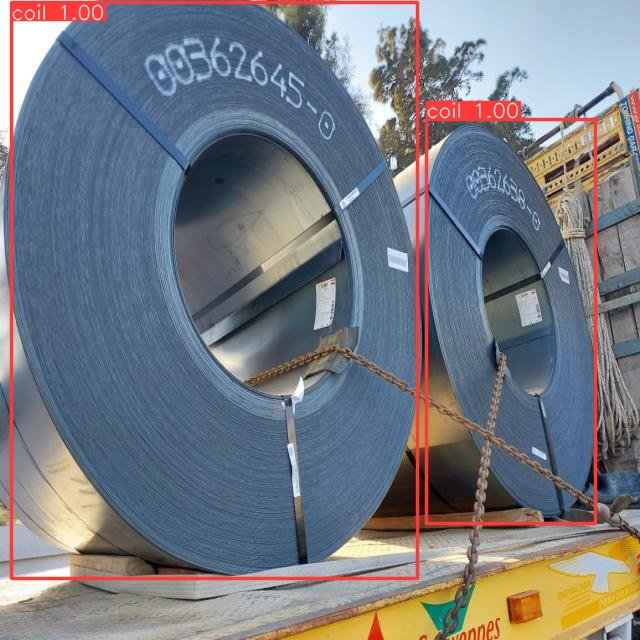

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict20/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [7]:
import numpy as np
from ultralytics import YOLO
import glob
from IPython.display import Image, display
model = YOLO('C:\\Users\\KimoStore\\Downloads\\runs\\detect\\train15\\weights\\best.pt')
result=model.predict(source='C:\\Users\\KimoStore\\tes3.jpeg',conf=0.45,save=True)



image 1/1 C:\Users\KimoStore\tes3.jpeg: 480x640 15 longcoils, 568.2ms
Speed: 5.3ms preprocess, 568.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict29


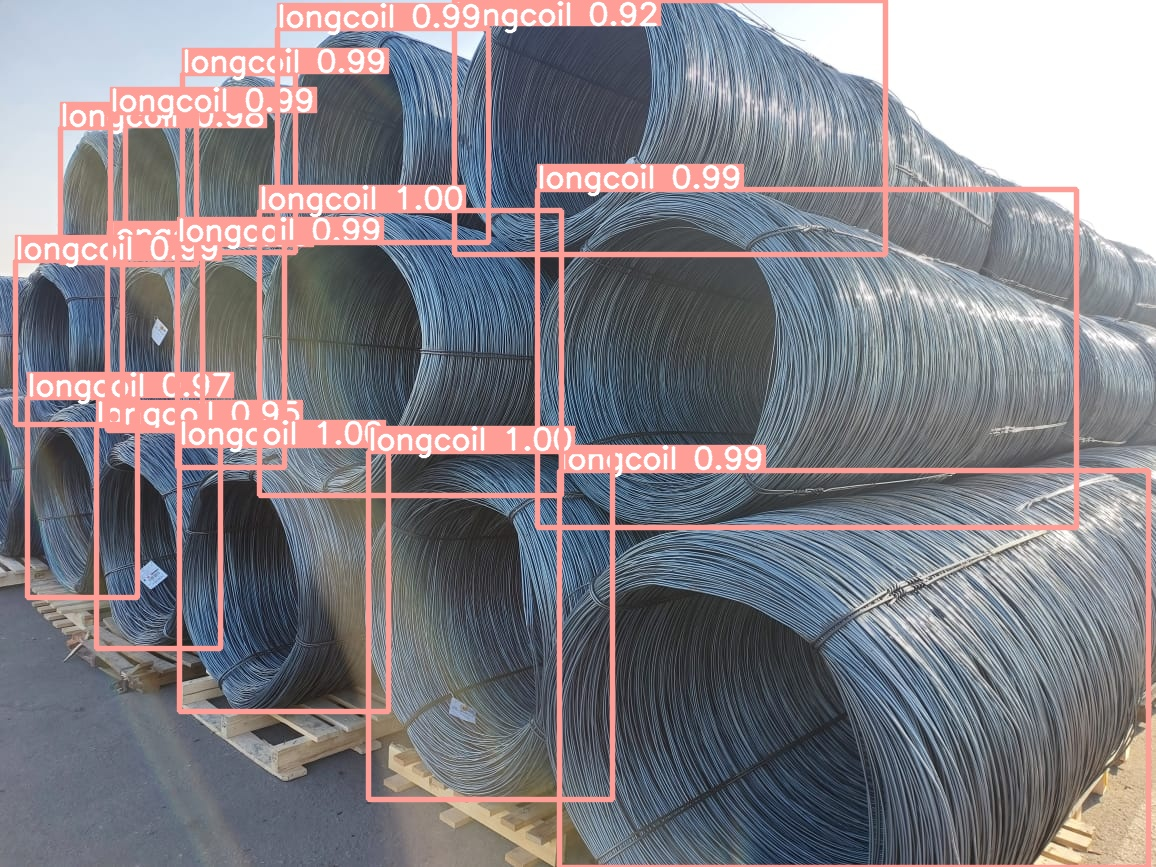



Number of coils detected:15


In [9]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict29/*.jpeg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
arrxy=result[0].boxes.xyxy
coordinates = np.array(arrxy)
x_coords = (coordinates[:, 0] + coordinates[:, 2]) / 2

y_coords = (coordinates[:, 1] + coordinates[:, 3]) / 2

midpoints = np.column_stack((x_coords, y_coords))

rounded_n_sorted_arr = np.round(midpoints[midpoints[:, 1].argsort()]).astype(int)

#print(rounded_n_sorted_arr[:40])
print("Number of coils detected:"+ str(len(rounded_n_sorted_arr)))